In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
## Modelo KMeans

# Importando os dados

import pandas as pd
import numpy as np

# dataset obtida no link https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset
# dataset foi salva no google drive para carregamento

url = 'https://docs.google.com/spreadsheets/d/1N-KOihE3XDDfHEsaj8dt9-y8jrVOv8wB/edit?usp=sharing&ouid=102198786401215745194&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# Carregar dataset

dataset = pd.read_excel(path, engine = 'openpyxl')
dados = dataset.drop("Class", axis = 1)

dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
### Análise da Saída: Dataset Trabalha com 7 tipos de feijões diferentes

dataset["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<AxesSubplot:>

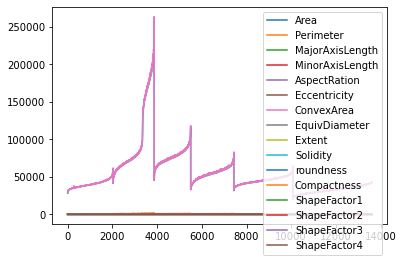

In [4]:
## Análise das características:
# Perceb-se variações muito grandes em algumas(50000-250000) e variações pequenas em outras (0-1)
dataset_caracteristicas = dados.columns
dataset.plot(y=dataset_caracteristicas, use_index=True)

In [5]:
# Escalonar e Não Normalizar, caso queira. o Escalonamento faz com que a variância de cada variável seja unitária para o modelo performar melhor 

from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
dados_escalonados = escala.fit_transform(dados)
pd.DataFrame(dados_escalonados)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440


[217775.99999999904,
 129900.24348529366,
 94742.04150074623,
 76474.31120247596,
 61893.70031951753,
 55050.114337391955,
 48811.982899245115,
 45242.27406210775,
 41975.60411460289,
 39766.7319211296]

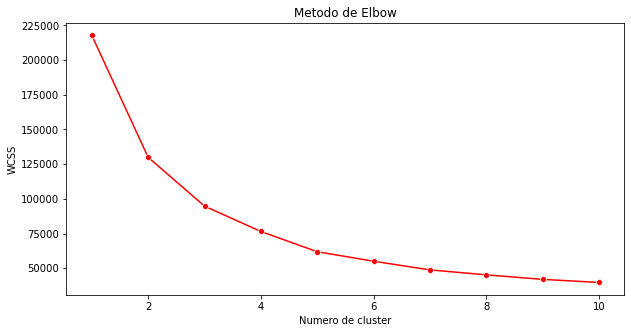

In [6]:
# Metodo Elbow para definiri a quantidade de Cluster (K)
import matplotlib.pyplot as plt
import seaborn as sb

def elbow(dados_escalonados):
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados_escalonados)
    wcss.append(kmeans.inertia_)
    
  #Plota Metodo Elbow
  plt.figure(figsize=(10,5))
  sb.lineplot(range(1,11), wcss, marker='o', color='red')
  plt.title('Metodo de Elbow')
  plt.xlabel('Numero de cluster')
  plt.ylabel('WCSS')
  return wcss
  
elbow(dados_escalonados)

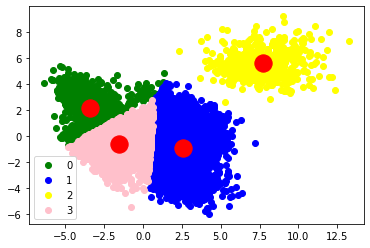

In [13]:
### KMeans utilizando os Dados Escalonados, Número de Clusters = 4

# PCA para plotar o gráfico
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

dados_pca = pca.fit_transform(dados_escalonados)

#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dados_pca)
 
#Getting unique labels
u_labels = np.unique(label)

colors = np.array(["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

#plotting the results:
for i in u_labels:
    plt.scatter(dados_pca[label == i , 0] , dados_pca[label == i , 1] , label = i, c=colors[i])

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

[23769960125994.375,
 7800576954419.342,
 2508982690625.61,
 1555376828640.9175,
 1186355597006.4985,
 824997361976.3937,
 615127337603.6632,
 493439391742.1636,
 389822470001.7243,
 323312283559.02264]

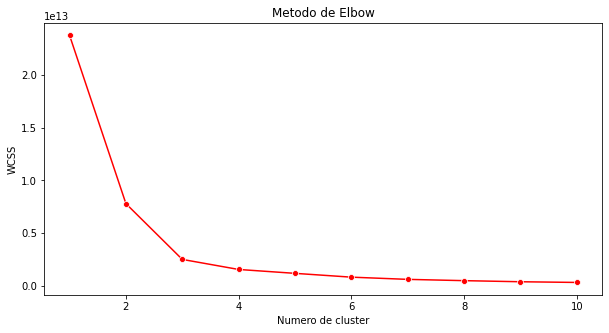

In [10]:
### KMeans utilizando os Dados Originais

elbow(dados)

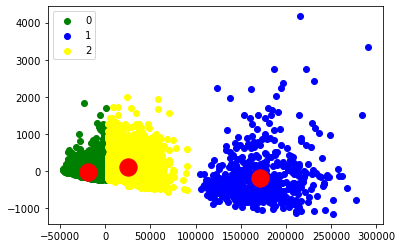

In [11]:
### KMeans utilizando os Dados Originais, Número de Clusters = 3

# PCA para plotar o gráfico
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

dados_pca = pca.fit_transform(dados)

#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dados_pca)
 
#Getting unique labels
u_labels = np.unique(label)

colors = np.array(["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

#plotting the results:
for i in u_labels:
    plt.scatter(dados_pca[label == i , 0] , dados_pca[label == i , 1] , label = i, c=colors[i])

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()